<a href="https://colab.research.google.com/github/Praveenareddykambam/002683913_Praveena/blob/002683913_Praveena/Praveena_2nd_assmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [ ]:

pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [ ]:
port_no=random.randint(5555,55555)

try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  h2o.cluster().shutdown()
  sys.exit(2)     


Checking whether there is an H2O instance running at http://localhost:36702..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpisxxzi54
  JVM stdout: /tmp/tmpisxxzi54/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpisxxzi54/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:36702
Connecting to H2O server at http://127.0.0.1:36702 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_by25mu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
url = "https://github.com/rajulah/Dataset/blob/master/smoking.csv"
df = h2o.import_file(path = url)
dff = pd.read_csv('https://github.com/rajulah/Dataset/blob/master/smoking.csv?raw=true')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
dff.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [ ]:
dff.describe()


,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [ ]:
dff['oral'].value_counts()

Y    55692
Name: oral, dtype: int64

In [ ]:
# since we have only one value in oral, we can drop it
dff = dff.drop('oral', axis=1)

In [ ]:
print(dff['dental caries'].value_counts())
print(dff['tartar'].value_counts())
print(dff['hearing(left)'].value_counts())
print(dff['hearing(right)'].value_counts())

0    43811
1    11881
Name: dental caries, dtype: int64
Y    30940
N    24752
Name: tartar, dtype: int64
1.0    54267
2.0     1425
Name: hearing(left), dtype: int64
1.0    54236
2.0     1456
Name: hearing(right), dtype: int64


In [ ]:
dff.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [ ]:
data = pd.get_dummies(dff)

In [ ]:
data.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_F,gender_M,tartar_N,tartar_Y
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,0.7,18.0,19.0,27.0,0,0,1,0,0,1
1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,0.6,22.0,19.0,18.0,0,0,1,0,0,1
2,2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,1.0,21.0,16.0,22.0,0,1,0,1,1,0
3,3,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,1.0,19.0,26.0,18.0,0,0,0,1,0,1
4,4,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,0.6,16.0,14.0,22.0,0,0,1,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [ ]:
data.corr()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_F,gender_M,tartar_N,tartar_Y
ID,1.000000,-0.000825,0.006306,0.004814,0.005384,0.009616,0.003088,0.002676,-0.004959,0.002489,...,0.003830,-0.001865,-0.002803,0.000823,0.000641,0.011476,-0.008657,0.008657,-0.002474,0.002474
age,-0.000825,1.000000,-0.479528,-0.324706,-0.026297,-0.195472,-0.192723,0.203993,0.208722,0.134023,...,-0.106118,0.032576,-0.063937,0.013031,-0.114984,-0.162557,0.290095,-0.290095,0.081796,-0.081796
height(cm),0.006306,-0.479528,1.000000,0.675656,0.378902,0.151133,0.155665,-0.078663,-0.078323,0.080585,...,0.383883,0.041737,0.126511,0.139720,0.079331,0.396675,-0.741556,0.741556,-0.055513,0.055513
weight(kg),0.004814,-0.324706,0.675656,1.000000,0.822842,0.108433,0.113155,-0.050094,-0.052836,0.266131,...,0.324808,0.120130,0.250634,0.209625,0.073536,0.302780,-0.574956,0.574956,-0.059921,0.059921
waist(cm),0.005384,-0.026297,0.378902,0.822842,1.000000,0.027458,0.037996,0.023790,0.019286,0.316922,...,0.235024,0.142690,0.252478,0.243141,0.044203,0.226259,-0.419568,0.419568,-0.046197,0.046197
eyesight(left),0.009616,-0.195472,0.151133,0.108433,0.027458,1.000000,0.354574,-0.046571,-0.048788,-0.019330,...,0.071410,-0.007966,0.019326,0.003850,0.003684,0.061204,-0.127424,0.127424,-0.012532,0.012532
eyesight(right),0.003088,-0.192723,0.155665,0.113155,0.037996,0.354574,1.000000,-0.043877,-0.046623,-0.013720,...,0.047608,-0.006921,0.024182,0.012195,0.016359,0.063017,-0.125680,0.125680,-0.006568,0.006568
hearing(left),0.002676,0.203993,-0.078663,-0.050094,0.023790,-0.046571,-0.043877,1.000000,0.510095,0.055219,...,0.003349,0.018074,0.004820,0.012864,-0.016100,-0.023209,0.009407,-0.009407,0.035396,-0.035396
hearing(right),-0.004959,0.208722,-0.078323,-0.052836,0.019286,-0.048788,-0.046623,0.510095,1.000000,0.049095,...,0.008060,0.009393,-0.005081,0.009245,-0.016376,-0.018855,0.011579,-0.011579,0.026698,-0.026698
systolic,0.002489,0.134023,0.080585,0.266131,0.316922,-0.019330,-0.013720,0.055219,0.049095,1.000000,...,0.072288,0.083204,0.094893,0.165724,0.029894,0.073109,-0.167289,0.167289,-0.006542,0.006542


<AxesSubplot:>

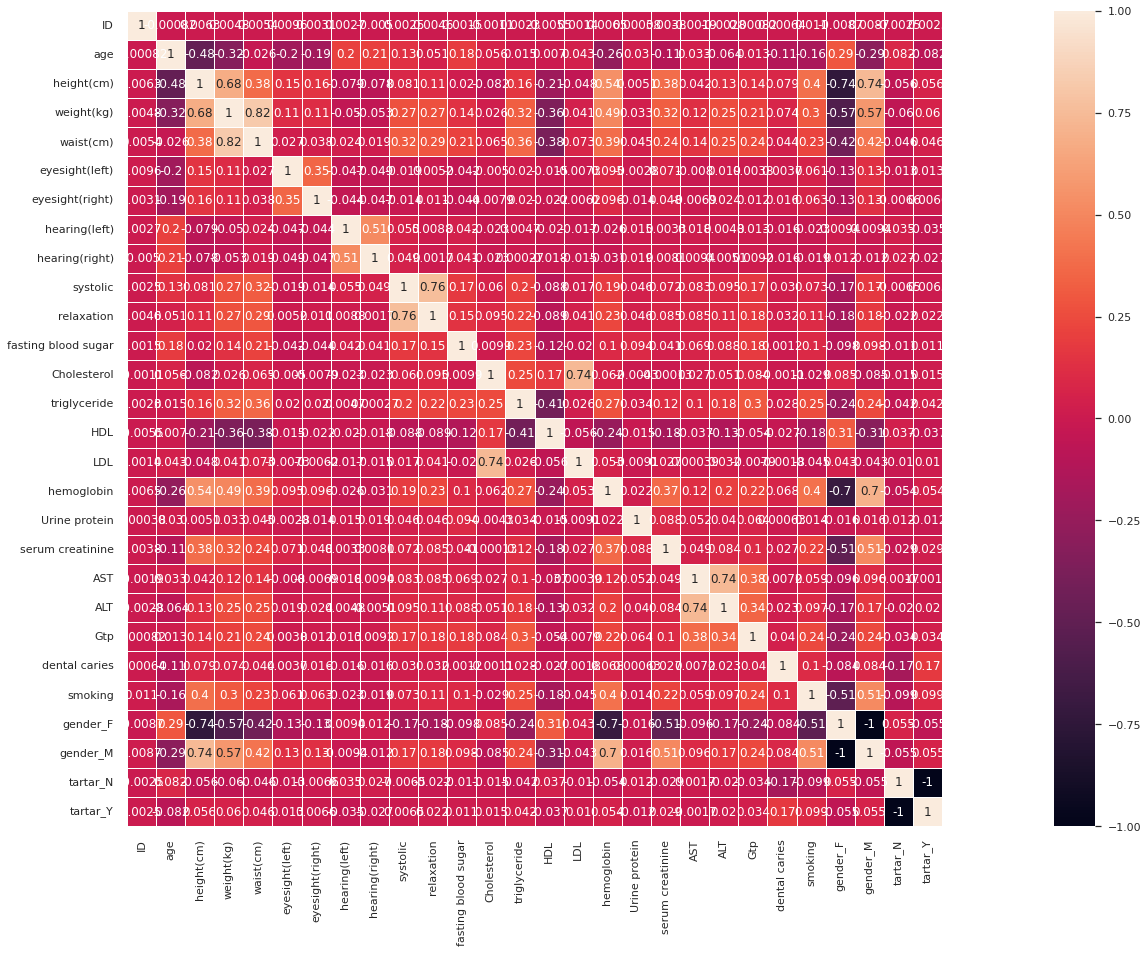

In [ ]:
sns.set(rc = {'figure.figsize':(40,15)})
sns.heatmap(data.corr(), linewidths=0.5, annot = True, square =True , )

In [ ]:
data.shape

(55692, 28)

In [ ]:
data["smoking_cat"] = pd.cut(data['smoking'], right = True,
                               bins=[-1,0,1], 
                               labels=['No', 'Yes'])

In [ ]:
data = data.drop('smoking',axis=1)

In [ ]:
data.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,serum creatinine,AST,ALT,Gtp,dental caries,gender_F,gender_M,tartar_N,tartar_Y,smoking_cat
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,0.7,18.0,19.0,27.0,0,1,0,0,1,No
1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,0.6,22.0,19.0,18.0,0,1,0,0,1,No
2,2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,1.0,21.0,16.0,22.0,0,0,1,1,0,Yes
3,3,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,1.0,19.0,26.0,18.0,0,0,1,0,1,No
4,4,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,0.6,16.0,14.0,22.0,0,1,0,1,0,No


In [ ]:
data["smoking_cat"].value_counts()

No     35237
Yes    20455
Name: smoking_cat, dtype: int64

In [ ]:
data = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data.types

{'ID': 'int',
 'age': 'int',
 'height(cm)': 'int',
 'weight(kg)': 'int',
 'waist(cm)': 'real',
 'eyesight(left)': 'real',
 'eyesight(right)': 'real',
 'hearing(left)': 'int',
 'hearing(right)': 'int',
 'systolic': 'int',
 'relaxation': 'int',
 'fasting blood sugar': 'int',
 'Cholesterol': 'int',
 'triglyceride': 'int',
 'HDL': 'int',
 'LDL': 'int',
 'hemoglobin': 'real',
 'Urine protein': 'int',
 'serum creatinine': 'real',
 'AST': 'int',
 'ALT': 'int',
 'Gtp': 'int',
 'dental caries': 'int',
 'gender_F': 'int',
 'gender_M': 'int',
 'tartar_N': 'int',
 'tartar_Y': 'int',
 'smoking_cat': 'enum'}

In [ ]:
# Create a 80% train and 20% test split from the data
pct_rows=0.80
df_train, df_test = data.split_frame([pct_rows])
print(df_train.shape)
print(df_test.shape)

(44698, 28)
(10994, 28)


In [ ]:

#Display all columns in X
X=data.columns
print(X)

['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'gender_F', 'gender_M', 'tartar_N', 'tartar_Y', 'smoking_cat']


In [ ]:
#Seperate Dependent variable from Independent variable
y_numeric ='smoking_cat'
X.remove(y_numeric) 
print(X)
     

['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'gender_F', 'gender_M', 'tartar_N', 'tartar_Y']


**H20 AutoML execution**

In [ ]:
min_mem_size=6 
run_time=222
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)
aml.train(x=X,y=y_numeric,training_frame=df_train)  

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,blending
Number of base models (used / total),7/39
# GBM base models (used / total),4/13
# XGBoost base models (used / total),1/21
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0


**Interpretation of the above results**


Interpreting the above results

RMSE: A common metric for assessing the discrepancies between values predicted by a model or estimator and values observed is the root-mean-square error. The range of this measure is zero to infinity; a lower number denotes a better model.

MAE: The average absolute difference between the target values and the anticipated values is known as the mean absolute error (MAE). The range of this measure is zero to infinity; a lower number denotes a better model.

RMSLE: Similar to RMSE, the root-mean-squared logarithmic error measure adds 1 to the natural logarithm of the anticipated and actual values. Overprediction is penalized less harshly by RMSLE than underprediction. When you don't want to punish discrepancies for high prediction values more severely than for tiny prediction values, it can also be a suitable metric. The range of this measure is zero to infinity; a lower number denotes a better model. Only when all label and projected values are non-negative is the RMSLE assessment metric returned.

r^2: The Pearson correlation coefficient between the labels and expected values is expressed as r squared (r2). This statistic has a value between 0 and 1; a higher value denotes a better model.

MAPE: The average absolute percent difference between the projected values and the labels is known as the mean absolute percentage error (MAPE). This statistic has a range from zero to infinity; a lower number denotes a better model.

With K-fold cross-validation, one may estimate a model's performance while still validating it internally without having to give up a validation split.

We will then look at the AutoML Leaderboard. The AutoML leaderboard evaluates the performance on this data to rank the models since we defined a leaderboard frame in the h2o.automl() method for scoring and ranking the models.

Each machine learning job (binary classification, multiclass classification, regression) has a default performance metric that is provided internally, and the leaderboard will be ranked by that metric. Mean residual deviance is the standard ranking indicator for regression.

In [ ]:
print(aml.leaderboard)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_3_AutoML_2_20230301_22013     0.889969   0.401763  0.813623                0.183021  0.360341  0.129846
StackedEnsemble_BestOfFamily_4_AutoML_2_20230301_22013  0.889597   0.401985  0.81404                 0.184196  0.360642  0.130063
StackedEnsemble_AllModels_2_AutoML_2_20230301_22013     0.885833   0.41258   0.808241                0.190887  0.365018  0.133238
StackedEnsemble_BestOfFamily_3_AutoML_2_20230301_22013  0.885833   0.41258   0.808241                0.190887  0.365018  0.133238
DRF_1_AutoML_2_20230301_22013                           0.885648   0.418459  0.810619                0.187444  0.367396  0.13498
StackedEnsemble_AllModels_1_AutoML_2_20230301_22013     0.885258   0.412829  0.80775                 0.188517  0.365294  0.13344
StackedEnsemble_BestOfFamily_2_AutoML_2_20230301_22013  0.885258   0.412829  0.80775        


**Analysing relation between all variables**


Variance Inflation Factor is known as VIF. It denotes multicollinearity between a group of several independent variables. A score greater than 10 indicates that the independent variable and another variable have a high correlation. The VIF value for each variable will be calculated to check for dependencies, and the variables with high VIF values will be removed.

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
Multic = data[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 
              'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 
              'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'gender_F', 'gender_M', 'tartar_N', 'tartar_Y', 'smoking_cat']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

AttributeError: ignored

In [ ]:
best_model = aml.leader
best_model.model_performance(df_test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.13073739684158767
RMSE: 0.36157626697778117
LogLoss: 0.4020013393315242
AUC: 0.8873341159484461
AUCPR: 0.7964281613170882
Gini: 0.7746682318968923
Null degrees of freedom: 10993
Residual degrees of freedom: 10986
Null deviance: 14408.107641405624
Residual deviance: 8839.205449221554
AIC: 8855.205449221554

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39392014007132015
       No    Yes    Error    Rate
-----  ----  -----  -------  ----------------
No     5240  1761   0.2515   (1761.0/7001.0)
Yes    502   3491   0.1257   (502.0/3993.0)
Total  5742  5252   0.2058   (2263.0/10994.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.39392      0.755219  236
max f2                       0.202523     0.848776  306
max f0point5                 0.648574     0.740036  133
max accuracy                 0.509116     0.809442  189
max precision                0.966282     1         0
max recall                   0.00520601   1         396
max specificity              0.966282     1         0
max absolute_mcc             0.469537     0.600516  206
max min_per_class_accuracy   0.477139     0.806456  203
max mean_per_class_accuracy  0.39392      0.811372  236
max tns                      0.966282     7001      0
max fns                      0.966282     3991      0
max fps                      0.00245803   7001      399
max tps                      0.00520601   3993      396
max tnr                      0.966282     1         0
max fnr                      0.966282     0.999499  0
max fpr                      0.00245803   1         399
max tpr                      0.00520601   1         396

Gains/Lift Table: Avg response rate: 36.32 %, avg score: 37.46 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100055                   0.924384           2.67823    2.67823            0.972727         0.938832    0.972727                    0.938832            0.0267969       0.0267969                  167.823   167.823            0.0263684
2        0.0200109                   0.908079           2.55308    2.61565            0.927273         0.916184    0.95                        0.927508            0.0255447       0.0523416                  155.308   161.565            0.0507704
3        0.0300164                   0.894019           2.50302    2.57811            0.909091         0.900325    0.936364                    0.918447            0.0250438       0.0773854                  150.302   157.811            0.0743859
4        0.0400218                   0.881753           2.30278    2.50927            0.836364         0.887819    0.911364                    0.91079             0.0230403       0.100426                   130.278   150.927            0.0948551
5        0.0500273                   0.870321           2.42793    2.493              0.881818         0.87552     0.905455                    0.903736            0.0242925       0.124718                   142.793   149.3              0.117291
6        0.100055                    0.820154           2.36785    2.43043            0.86             0.844712    0.882727                    0.874224            0.118457        0.243176                   136.785   143.043            0.22475
7        0.149991                    0.773908           2.23676    2.36595            0.812386         0.796

In [ ]:
%matplotlib inline
best_model.varimp_plot()

H2OValueError: ignored

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

data_as_df = data.as_data_frame()



In [ ]:
# data_as_df.info()
cleanup_smoking = {"smoking_cat":     {"Yes": 1, "No": 0}}
data_as_df = data_as_df.replace(cleanup_smoking)
data_as_df.head()
data_as_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  int64  
 8   hearing(right)       55692 non-null  int64  
 9   systolic             55692 non-null  int64  
 10  relaxation           55692 non-null  int64  
 11  fasting blood sugar  55692 non-null  int64  
 12  Cholesterol          55692 non-null  int64  
 13  triglyceride         55692 non-null  int64  
 14  HDL                  55692 non-null  int64  
 15  LDL                  55692 non-null 

In [ ]:
model = sm.OLS(data_as_df['smoking_cat'], data_as_df[[ 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 
                                          'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 
                                          'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
                                          'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 
                                          'Gtp', 'dental caries', 'gender_F', 'gender_M', 'tartar_N', 'tartar_Y']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            smoking_cat   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     1011.
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        03:50:22   Log-Likelihood:                -28313.
No. Observations:               55692   AIC:                         5.668e+04
Df Residuals:                   55667   BIC:                         5.690e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                 -6.685e-05      0.000     -0.360      0.719      -0.000       0.000
height(cm)              0.0037      0.000     10.441      0.000       0.003       0.004
weight(kg)             -0.0019      0.000     -5.485      0.000      -0.003      -0.001
waist(cm)           -8.832e-05      0.000     -0.226      0.821      -0.001       0.001
eyesight(left)         -0.0032      0.004     -0.842      0.400      -0.011       0.004
eyesight(right)        -0.0026      0.004     -0.672      0.502      -0.010       0.005
hearing(left)          -0.0346      0.013     -2.730      0.006      -0.059      -0.010
hearing(right)          0.0003      0.013      0.025      0.980      -0.024       0.025
systolic               -0.0023      0.000    -11.421      0.000      -0.003      -0.002
relaxation              0.0017      0.000      6.192      0.000       0.001       0.002
fasting blood sugar     0.0005   8.79e-05      6.089      0.000       0.000       0.001
Cholesterol            -0.0004    8.8e-05     -4.706      0.000      -0.001      -0.000
triglyceride            0.0009    3.3e-05     26.734      0.000       0.001       0.001
HDL                     0.0005      0.000      3.392      0.001       0.000       0.001
LDL                 -2.824e-05   7.15e-05     -0.395      0.693      -0.000       0.000
hemoglobin              0.0196      0.002     12.295      0.000       0.017       0.023
Urine protein           0.0034      0.004      0.802      0.423      -0.005       0.012
serum creatinine       -0.1124      0.009    -12.439      0.000      -0.130      -0.095
AST                    -0.0005      0.000     -3.337      0.001      -0.001      -0.000
ALT                    -0.0003   8.56e-05     -3.702      0.000      -0.000      -0.000
Gtp                     0.0010   3.97e-05     25.253      0.000       0.001       0.001
dental caries           0.0565      0.004     13.258      0.000       0.048       0.065
gender_F               -0.3680      0.033    -11.199      0.000      -0.432      -0.304
gender_M                0.0475      0.037      1.283      0.200      -0.025       0.120
tartar_N               -0.1874      0.035     -5.370      0.000      -0.256      -0.119
tartar_Y               -0.1332      0.035     -3.820      0.000      -0.202      -0.065
==============================================================================
Omnibus:                    13704.394   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2387.596
Skew:                          -0.030   Prob(JB):                         0.00
Kurtosis:                       1.987   Cond. No.                     1.05e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

.

**Is the relationship significant?**

The r square value is 0.3 which indicates the relationship is not that significant. The p values are less than 0.05 for most of the attributes which also indicates relationship is significant for some variables but not for others like age, haemoglobin, gender

**Are any model assumptions violated?**

no, the because the dependent variable is binary (0/1) categorical, all the models in AutoML make sense out of this.

**Is there any multicollinearity in the model?**

Yes, from the ols model data summary, the eigenvalue is smallest that indicates there is multicollinearity in the data with some of the variables like gender_F, haemoglobin, triglyceride having strong multicollinearity.

**In the multivariate models are the predictor variables independent of all other predictor variables?**

No, they are not all independent of each other, we can know that from the correlation heap map.

1.features like gender' and haemoglobin' have a strong correlation with each other

2.gender and serum_creatinine have a strong correlation with each other

**In the multivariate models rank the most significant predictor variables and exclude insignificant variables from the model**

the most significant predictor variable is LDL

**Does the model make sense?**

Yes the model is AutoML and since it is a classification problem, it makes sense. Also it makes sense that LDL and serum creatine levels and age determine the presence of smoke which the model feature improtance got right.

**Does regularization make sense?**

Yes, the rmse from the best model is 0.3615, and, in regularization, the rmse is 0.39 which is similar


**Which independent variables are significant?**

We can see that LDL, HDL, serum_creatinine are some of the most significant features

**Which hyperparameters are important?**

All of the hyperparameters are significant because they affect how the model operates, although some are more significant than others. Examples include booster, max depth, ntrees in XGBOOST, and learn rate in GBM.



In [ ]:
!pip3 install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 4.2 MB/s eta 0:00:00


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprxhfddaf
  JVM stdout: /tmp/tmprxhfddaf/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprxhfddaf/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_5eu3kl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
data = h2o.H2OFrame(df)

**LICENSE**

Copyright 2023 MIT License

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

